In [1]:
import nltk 
import pandas as pd 
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%pylab inline
from nltk.corpus import stopwords

import pycountry as pc

Populating the interactive namespace from numpy and matplotlib


In [2]:
email_path = "./hillary-clinton-emails/Emails.csv"
email_df = pd.read_csv(email_path, encoding="utf-8")

In [3]:
email_df.columns

Index([u'Id', u'DocNumber', u'MetadataSubject', u'MetadataTo', u'MetadataFrom',
       u'SenderPersonId', u'MetadataDateSent', u'MetadataDateReleased',
       u'MetadataPdfLink', u'MetadataCaseNumber', u'MetadataDocumentClass',
       u'ExtractedSubject', u'ExtractedTo', u'ExtractedFrom', u'ExtractedCc',
       u'ExtractedDateSent', u'ExtractedCaseNumber', u'ExtractedDocNumber',
       u'ExtractedDateReleased', u'ExtractedReleaseInPartOrFull',
       u'ExtractedBodyText', u'RawText'],
      dtype='object')

In [4]:
email_df.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


# QUESTION 1 

## WORLDCLOUD RAW

In [5]:
email_df.columns

Index([u'Id', u'DocNumber', u'MetadataSubject', u'MetadataTo', u'MetadataFrom',
       u'SenderPersonId', u'MetadataDateSent', u'MetadataDateReleased',
       u'MetadataPdfLink', u'MetadataCaseNumber', u'MetadataDocumentClass',
       u'ExtractedSubject', u'ExtractedTo', u'ExtractedFrom', u'ExtractedCc',
       u'ExtractedDateSent', u'ExtractedCaseNumber', u'ExtractedDocNumber',
       u'ExtractedDateReleased', u'ExtractedReleaseInPartOrFull',
       u'ExtractedBodyText', u'RawText'],
      dtype='object')

In [6]:
email_df.shape

(7945, 22)

In [7]:
email_df.dropna(subset=['ExtractedBodyText'], inplace=True)

In [8]:
email_df.shape

(6742, 22)

In [9]:
email_df['ExtractedSubject'].isnull().any()
email_df.dropna(subset=['ExtractedSubject'], inplace=True)
email_df.shape

(5425, 22)

In [10]:
text = email_df['ExtractedBodyText']

In [11]:
text = text.append(email_df['ExtractedSubject'])

In [12]:
test_text = " ".join(text) # to add space

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,stopwords=stopwords)

(-0.5, 399.5, 199.5, -0.5)

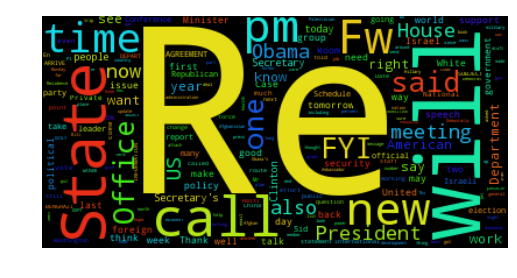

In [13]:
# Generate a word cloud image
wordcloud = WordCloud().generate(test_text)
# Display the generated image:
# the matplotlib way: 
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")


##  PREPROCESSING

### TOKENIZATION

For example, you can define a tokenizer that picks out sequences of alphanumeric characters as tokens and drops everything else:



the following tokenizer forms tokens out of alphabetic sequences,
money expressions,

In [14]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|\$')

In [15]:
tokens = tokenizer.tokenize(test_text)

### CASE FOLDING

In [16]:
tokens_lower_case = [token.lower() for token in tokens ]

### REMOVE STOPWORDS 

In [17]:
stop_words = STOPWORDS

In [18]:
len(tokens_lower_case)

444927

In [19]:
filtered_words_tmp = [word for word in tokens_lower_case if word not in stop_words]

In [20]:
len(filtered_words_tmp)

271349

In [21]:
stop_words_2 = stopwords.words('english')

In [22]:
filtered_words_lower_case = [word for word in filtered_words_tmp if word not in stop_words_2]

In [23]:
len(filtered_words_lower_case)

256562

### STEMMING

In [24]:
porter = nltk.PorterStemmer()

token_stem_lower_case = [porter.stem(token) for token in filtered_words_lower_case]

## WORLDCLOUD NEW 

#### WITH STEMMING 

In [25]:
new_text = " ".join(token_stem_lower_case)

(-0.5, 399.5, 199.5, -0.5)

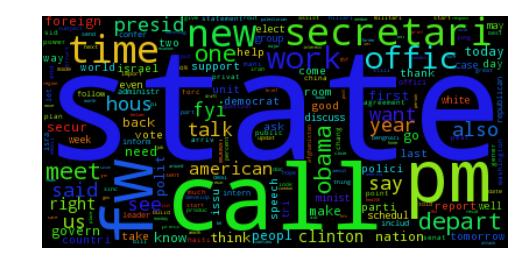

In [26]:
# Generate a word cloud image
wordcloud = WordCloud().generate(new_text)
# Display the generated image:
# the matplotlib way: 
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")


####  WITHOUT STEMMING

(-0.5, 399.5, 199.5, -0.5)

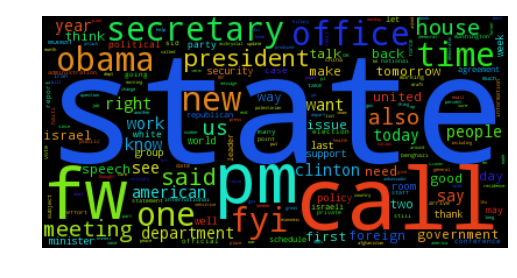

In [27]:
new_text = " ".join(filtered_words_lower_case)
# Generate a word cloud image
wordcloud = WordCloud().generate(new_text)
# Display the generated image:
# the matplotlib way: 
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")


# QUESTION  2

 1 - check if there is a country and also the abreviation in bodytext one by one
 2 - If is not there ignore the email
 3 - If it's there add the country in the new column in a list (it may be multiple)
 

In [28]:
from nltk.sentiment.util import *

/home/trinh/anaconda2/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [30]:
def get_polarity_score(text):
    """ return score between 0 and 1, 0 is bad 1 is happy"""
    vader_analyzer = SentimentIntensityAnalyzer()
    return (vader_analyzer.polarity_scores(text)['compound']+1)/2

In [31]:
def return_country(cont_list):
    tmp = []
    cont_list_filtered = [word for word in cont_list if word not in stop_words]
    for token in cont_list_filtered:
        if token in ["PM","AM","TO"]: # SAINT PIERRE AND MIQUELON CODE ALPHA IS PM ARMENIA IS AM, TO is TONGA
            continue
        try:
            tmp.append(pc.countries.get(name = token).name)        
        except:
            None    
        try:
            tmp.append(pc.countries.get(alpha_2 = token).name)
        except:
            None
    if tmp:
        return pd.Series(tmp).drop_duplicates().values
    else:
        return np.nan

In [32]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|\$')

In [33]:
email_df['token'] = email_df['ExtractedBodyText'].apply(tokenizer.tokenize)
email_df['token'].head()

2                                                 [Thx]
5     [Pis, print, H, hrod17, clintonernailcom, Wedn...
8                                                 [FYI]
9     [B6, Wednesday, September, 12, 2012, 6, 16, PM...
10                                            [Fyi, B6]
Name: token, dtype: object

In [34]:
email_df['token_subject'] = email_df['ExtractedSubject'].apply(tokenizer.tokenize)
email_df['token_subject'].head()

2                                  [Re, Chris, Stevens]
5     [Meet, The, Right, Wing, Extremist, Behind, An...
8                          [FVV, Secretary, s, remarks]
9                                     [more, on, Libya]
10    [AbZ, and, Hb3, on, Libya, and, West, Bank, Gaza]
Name: token_subject, dtype: object

In [ ]:
email_df['country'] = email_df['token'].apply(return_country)

In [ ]:
email_df['country'].value_counts()

In [35]:
def return_country_test(cont_list,country_sentiment):
    tmp = []
    cont_list_filtered = [word for word in cont_list if word not in stop_words]
    for token in cont_list_filtered:
        try:
            country = pc.countries.get(name = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None    
        try:
            country=pc.countries.get(alpha_2 = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None
    for elem in tmp:
        if elem in country_sentiment.index:
            country_sentiment.loc[elem]['NumberTimes'] = country_sentiment.loc[elem]['NumberTimes']+1
        else:
            country_sentiment.set_value(elem,'NumberTimes',1)

    
    

In [36]:
country_sentiment = pd.DataFrame(columns=['NumberTimes','Sentiment'])

In [37]:
country_sentiment

,NumberTimes,Sentiment


In [38]:
email_df['token'].apply(return_country_test,args=(country_sentiment,))

[]
[u'Saint Pierre and Miquelon', u'Tonga', u'Norway']
[]
[u'Saint Pierre and Miquelon', u'Libya']
[]
[]
[u'Saint Pierre and Miquelon', u'R\xe9union', u'Libya']
[]
[]
[]
[u'Saint Pierre and Miquelon', u'Libya']
[u'Saint Pierre and Miquelon', u'Libya']
[]
[]
[]
[]
[]
[u'Egypt', u'Libya', u'Yemen', u'Tonga', u'Norway']
[]
[]
[u'Yemen']
[u'Saint Pierre and Miquelon', u'Libya', u'Egypt']
[]
[]
[u'Tonga', u'Norway']
[]
[]
[]
[]
[]
[u'Armenia', u'Libya', u'Anguilla', u'Tonga', u'Norway']
[]
[]
[]
[u'Tonga', u'Norway']
[u'Libya', u'Egypt']
[u'Iraq', u'Tonga', u'Norway']
[u'Saint Pierre and Miquelon', u'Libya', u'Egypt']
[u'Egypt', u'Israel', u'Libya', u'Tonga', u'Norway']
[u'Saint Pierre and Miquelon']
[u'Tonga', u'Norway', u'India', u'Armenia', u'R\xe9union']
[u'Panama', u'Armenia', u'Papua New Guinea', u'Libya', u'Tonga', u'Norway']
[]
[]
[]
[]
[u'Tunisia', u'Micronesia, Federated States of', u'Saint Pierre and Miquelon', u'Spain']
[u'Saint Pierre and Miquelon', u'Libya', u'Tonga', u'Norway

2       None
5       None
8       None
9       None
10      None
12      None
14      None
16      None
17      None
18      None
20      None
21      None
22      None
23      None
24      None
26      None
27      None
28      None
29      None
30      None
31      None
33      None
34      None
38      None
39      None
40      None
42      None
43      None
44      None
45      None
        ... 
7900    None
7901    None
7903    None
7905    None
7907    None
7908    None
7910    None
7911    None
7912    None
7914    None
7916    None
7919    None
7920    None
7921    None
7922    None
7923    None
7924    None
7925    None
7926    None
7927    None
7928    None
7929    None
7930    None
7932    None
7933    None
7937    None
7938    None
7939    None
7941    None
7944    None
Name: token, dtype: object

In [39]:
country_sentiment

,NumberTimes,Sentiment
Saint Pierre and Miquelon,142,NaN
Tonga,72,NaN
Norway,52,NaN
Libya,39,NaN
Réunion,19,NaN
Egypt,24,NaN
Yemen,8,NaN
Armenia,152,NaN
Anguilla,3,NaN
Iraq,43,NaN


In [ ]:
email_df.dropna(subset=['country'],inplace=True)

In [ ]:
email_df['country'][5]

In [ ]:
email_df['country'].head()

In [ ]:
email_df['sentiment'] = email_df['ExtractedBodyText'].apply(get_polarity_score)

In [ ]:
email_df.head()

In [ ]:
email_df['ExtractedBodyText'][46]

In [ ]:
email_df['country'].value_counts()

In [ ]:
pc.countries.get(name = u'Libya')

In [ ]:
email_df.groupby('country').mean()['sentiment']